In [8]:
# You are a data scientist working for a healthcare company, and you have been tasked with creating a 
# decision tree to help identify patients with diabetes based on a set of clinical variables. You have been 
# given a dataset (diabetes.csv) with the following variables:

# 1. Pregnancies: Number of times pregnant (integer)

# 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

# 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

# 4. SkinThickness: Triceps skin fold thickness (mm) (integer)

# 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

# 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

# Here’s the dataset link: 

 https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

# Your goal is to create a decision tree to predict whether a patient has diabetes based on the other 
# variables. Here are the steps you can follow:
    
# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to 
# understand the distribution and relationships between the variables.

# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical 
# variables into dummy variables if necessary.

# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use 
# cross-validation to optimize the hyperparameters and avoid overfitting.

# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, 
# precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results

# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important 
# variables and their thresholds. Use domain knowledge and common sense to explain the patterns and 
# trends.

# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the 
# dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and 
# risks

# By following these steps, you can develop a comprehensive understanding of decision tree modeling and 
# its applications to real-world healthcare problems. Good luck!

IndentationError: unexpected indent (738473990.py, line 19)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Descriptive statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [7]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

<AxesSubplot: >

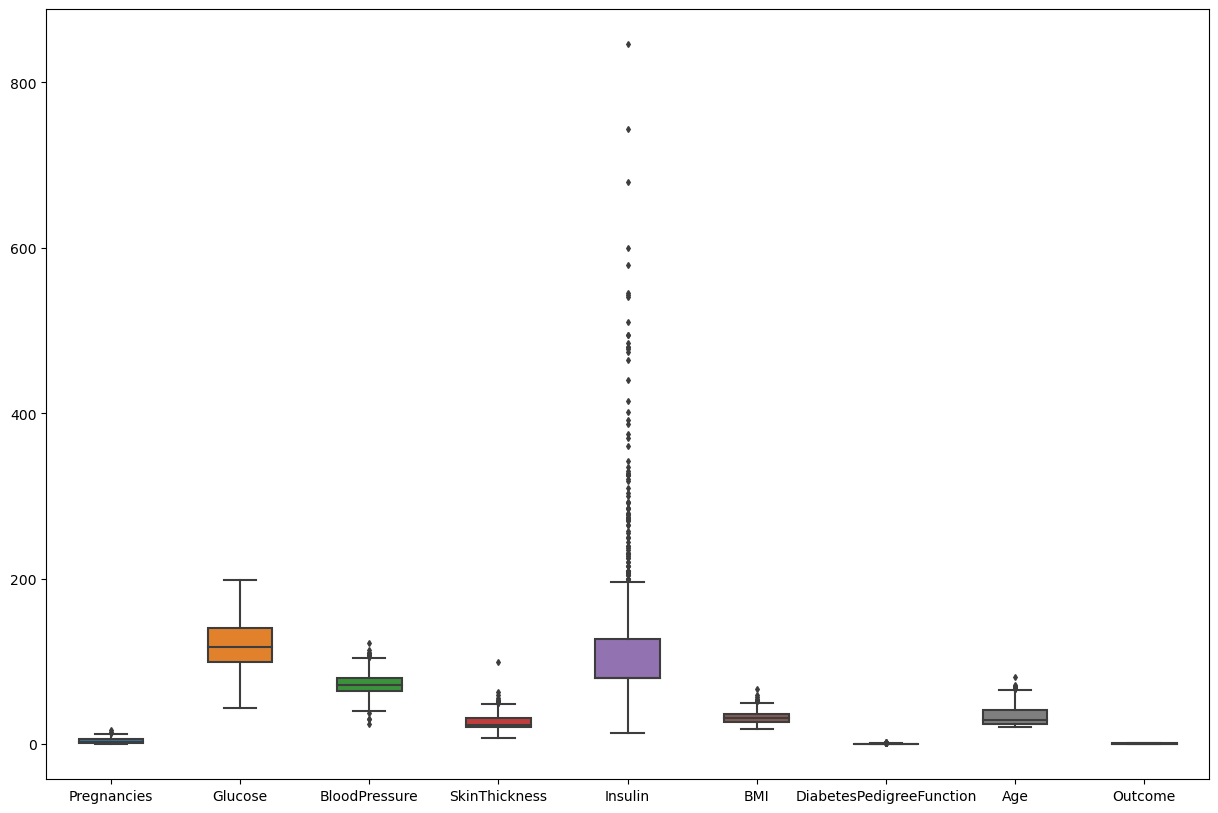

In [8]:
#now we have dealt with the 0 values and data looks better. But, there still are outliers present in some columns.lets visualize it
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


There are no categorical variables in this dataset, so we don't need to do this step.

In [10]:
from sklearn.model_selection import train_test_split

# Define X and y
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
dt = DecisionTreeClassifier()

# Train the model
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [12]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,69.105469,20.536458,79.799479,31.992578,0.304,21
618,9,112.0,82.000000,24.000000,79.799479,28.200000,1.282,50
346,1,139.0,46.000000,19.000000,83.000000,28.700000,0.654,22
294,0,161.0,50.000000,20.536458,79.799479,21.900000,0.254,65
231,6,134.0,80.000000,37.000000,370.000000,46.200000,0.238,46


[Text(0.4837811757719715, 0.9642857142857143, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.20947149643705462, 0.8928571428571429, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.08788598574821853, 0.8214285714285714, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.028503562945368172, 0.75, 'x[4] <= 48.5\ngini = 0.017\nsamples = 119\nvalue = [118, 1]'),
 Text(0.019002375296912115, 0.6785714285714286, 'x[6] <= 0.63\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.009501187648456057, 0.6071428571428571, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.028503562945368172, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03800475059382423, 0.6785714285714286, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.14726840855106887, 0.75, 'x[5] <= 49.1\ngini = 0.265\nsamples = 102\nvalue = [86, 16]'),
 Text(0.10451306413301663, 0.6785714285714286, 'x[6] <= 0.501\ngini = 0.243\

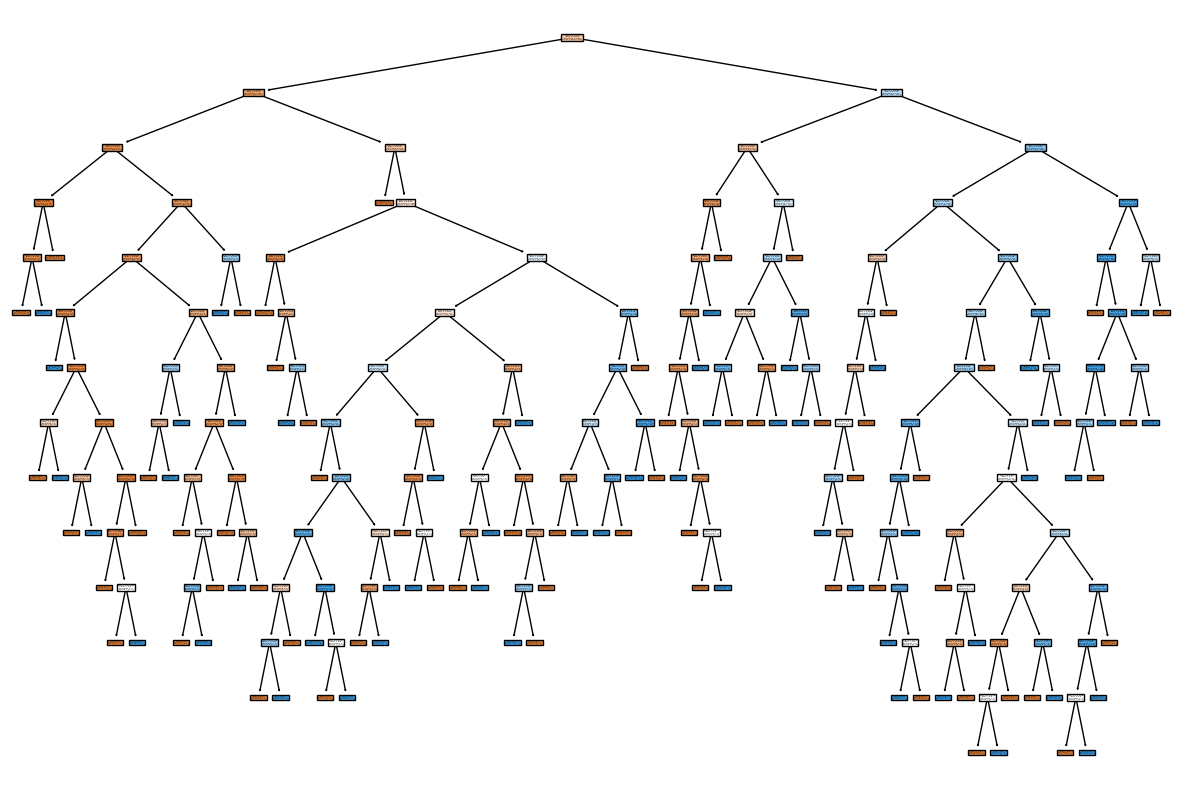

In [14]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [15]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Define the hyperparameters to tune
params = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 6),
    'criterion': ['gini', 'entropy']
}

In [16]:

# Instantiate the grid search
grid = GridSearchCV(estimator=dt, param_grid=params, cv=5, scoring='accuracy')


In [17]:

# Fit the grid search to the training data
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'min_samples_leaf': range(1, 6),
                         'min_samples_split': range(2, 11)},
             scoring='accuracy')

In [18]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [21]:
# Make predictions on the test set
y_pred=grid.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



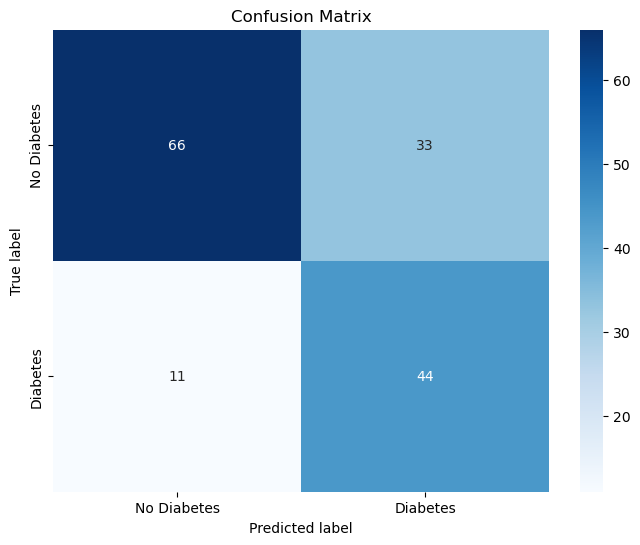

Accuracy: 0.7142857142857143
Precision: 0.5714285714285714
Recall: 0.8
F1 Score: 0.6666666666666666


In [25]:

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        77
           1       0.80      0.57      0.67        77

    accuracy                           0.71       154
   macro avg       0.73      0.71      0.71       154
weighted avg       0.73      0.71      0.71       154

